#### 분산 분석

In [2]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, coef=True, random_state=0)
dfX0 = pd.DataFrame(X0, columns=['X'])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=['Y'])
df = pd.concat([dfX, dfy], axis=1)

model = sm.OLS.from_formula("Y ~ X", data=df)
result = model.fit()

In [4]:
print("TSS = ", result.uncentered_tss)
print("ESS = ", result.mse_model)
print("RSS = ", result.ssr)
print("ESS + RSS = ", result.mse_model + result.ssr)
print("R squared = ", result.rsquared)

TSS =  291345.75789830607
ESS =  188589.61349210917
RSS =  102754.33755137533
ESS + RSS =  291343.9510434845
R squared =  0.6473091780922586


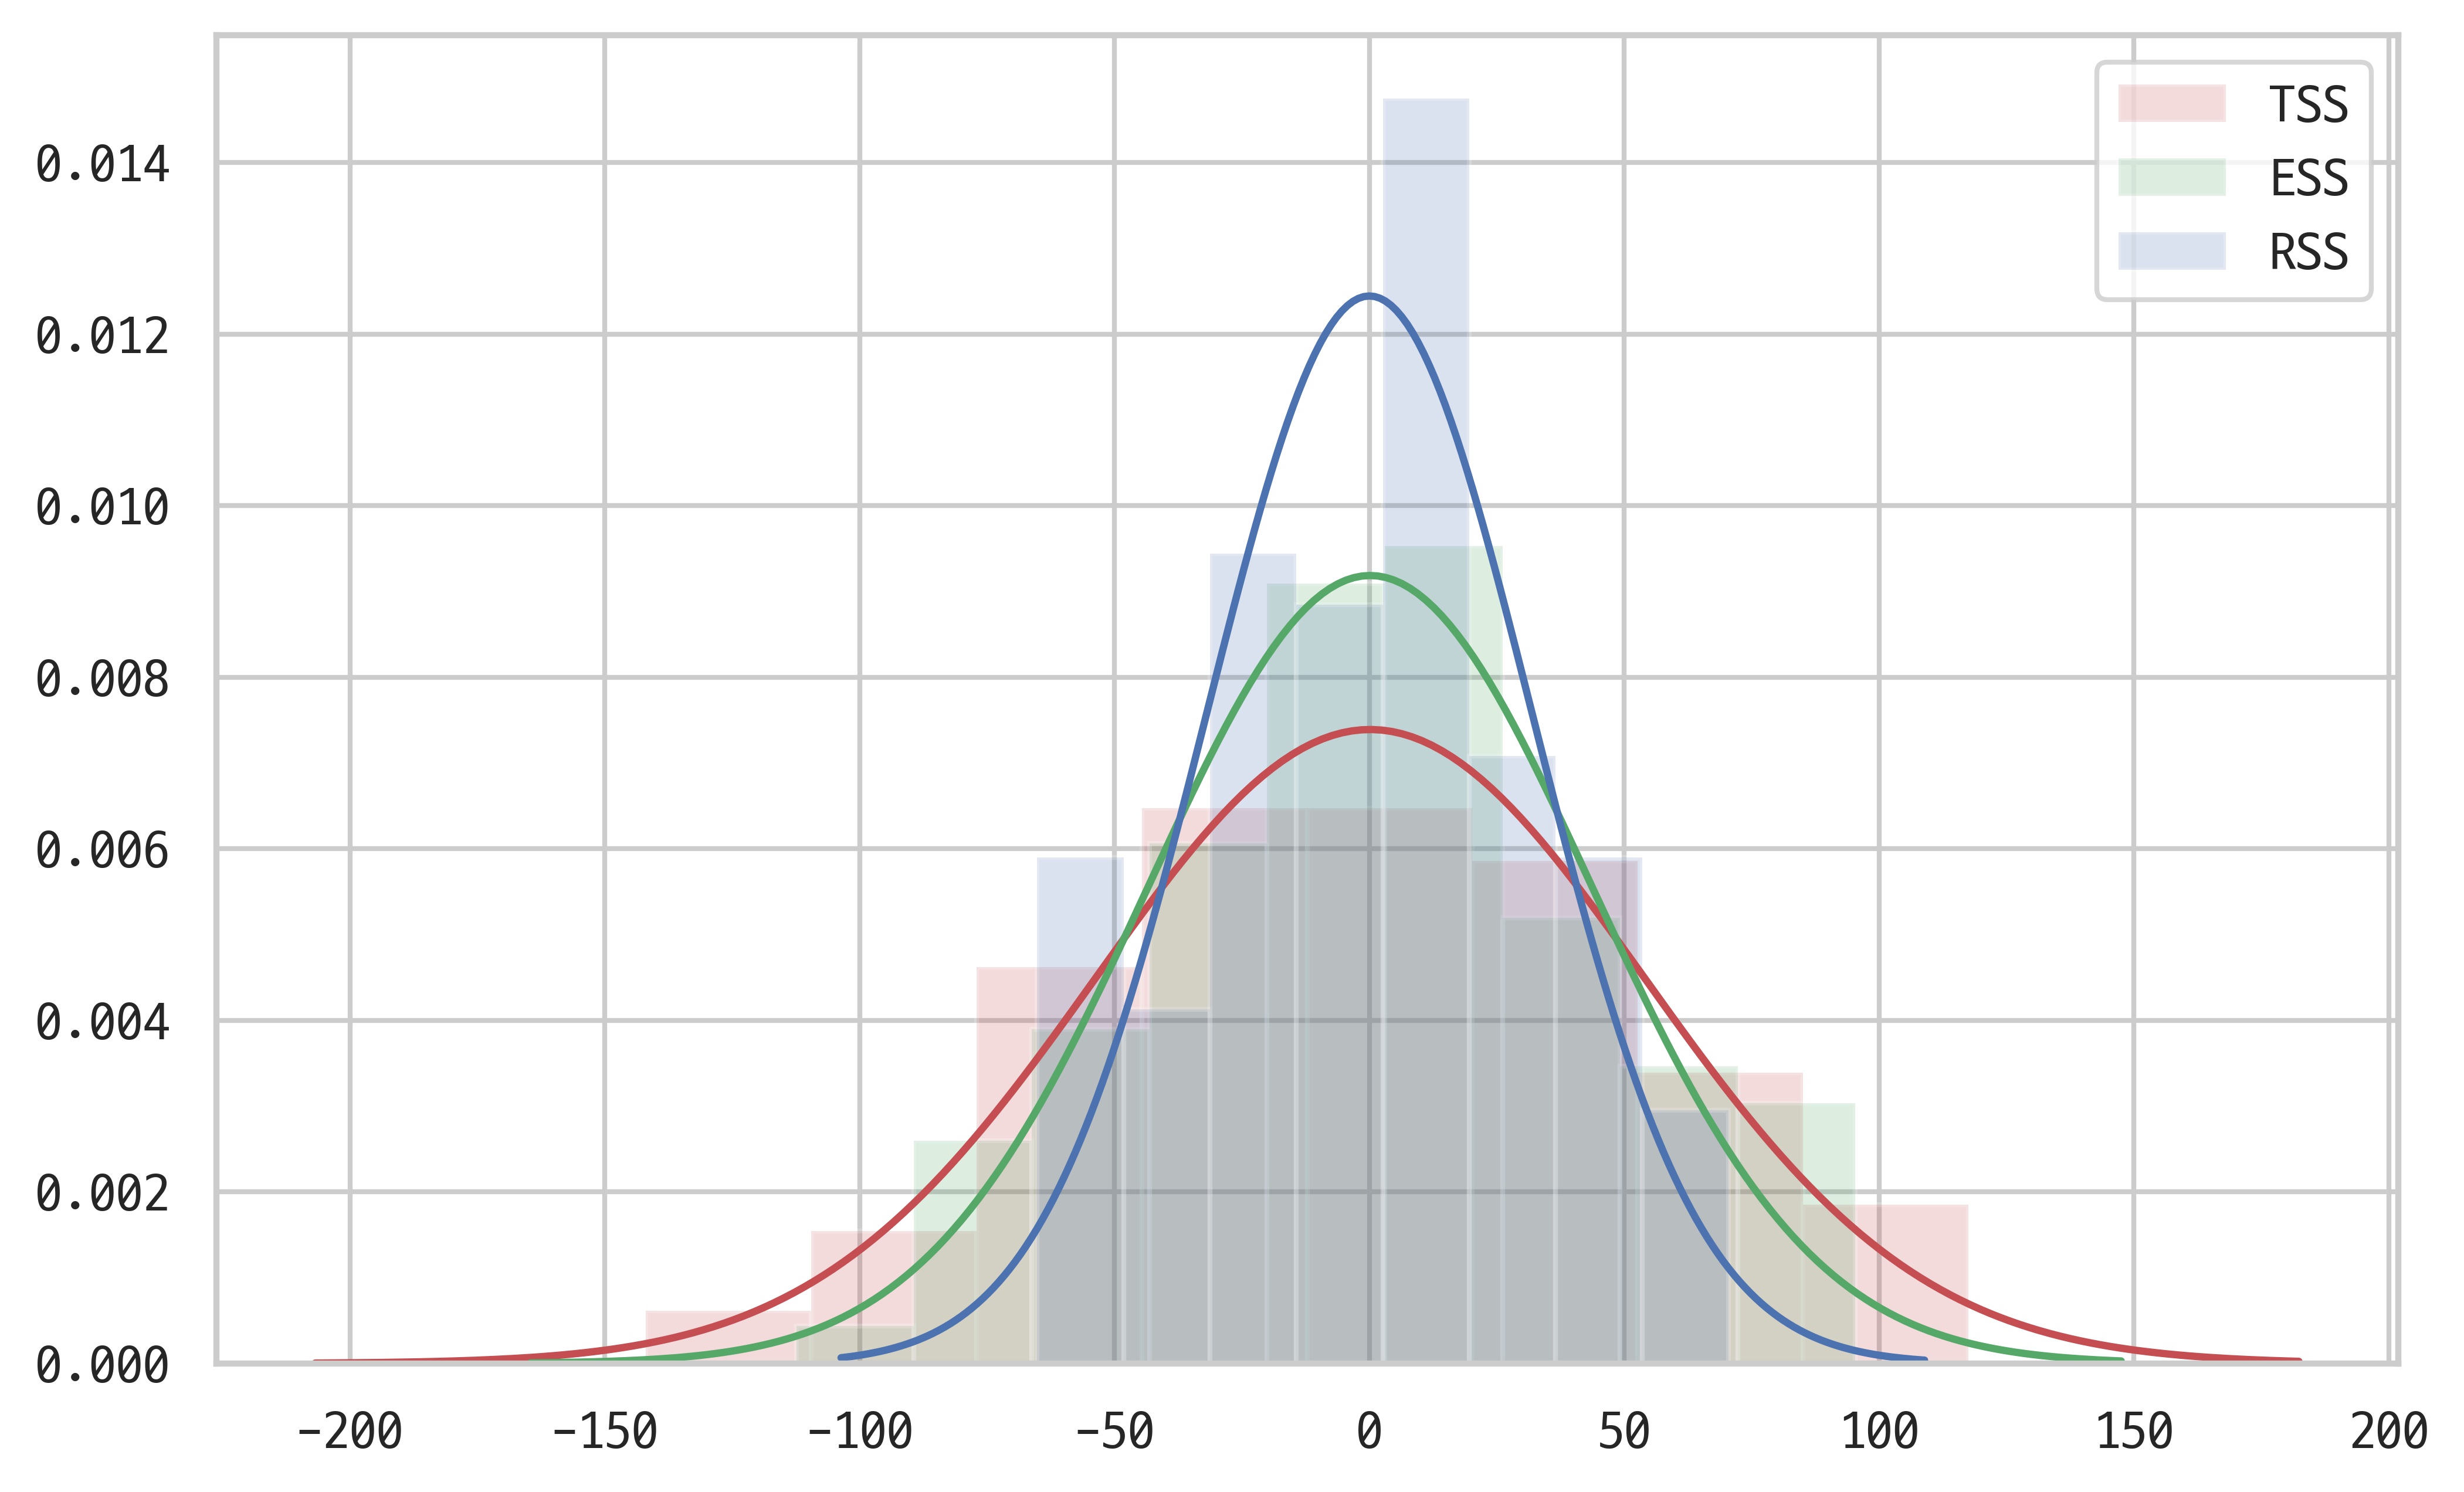

In [5]:
sns.distplot(y, kde=False, fit=sp.stats.norm, 
             hist_kws={"color": "r", "alpha": 0.2}, fit_kws={"color": "r"}, label="TSS")
sns.distplot(result.fittedvalues, kde=False, fit=sp.stats.norm, 
             hist_kws={"color": "g", "alpha": 0.2}, fit_kws={"color": "g"}, label="ESS")
sns.distplot(result.resid, kde=False, fit=sp.stats.norm, 
             hist_kws={"color": "b", "alpha": 0.2}, fit_kws={"color": "b"}, label="RSS")
plt.legend()
plt.show()

#### 회귀 분석 F-검정과 분산 분석의 관계

In [6]:
sm.stats.anova_lm(result)

,df,sum_sq,mean_sq,F,PR(>F)
X,1.0,188589.613492,188589.613492,179.863766,6.601482e-24
Residual,98.0,102754.337551,1048.513648,NaN,NaN


In [7]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     179.9
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           6.60e-24
Time:                        21:06:00   Log-Likelihood:                -488.64
No. Observations:                 100   AIC:                             981.3
Df Residuals:                      98   BIC:                             986.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4425      3.244     -0.753      0.4

#### 결정 계수와 상관 계수

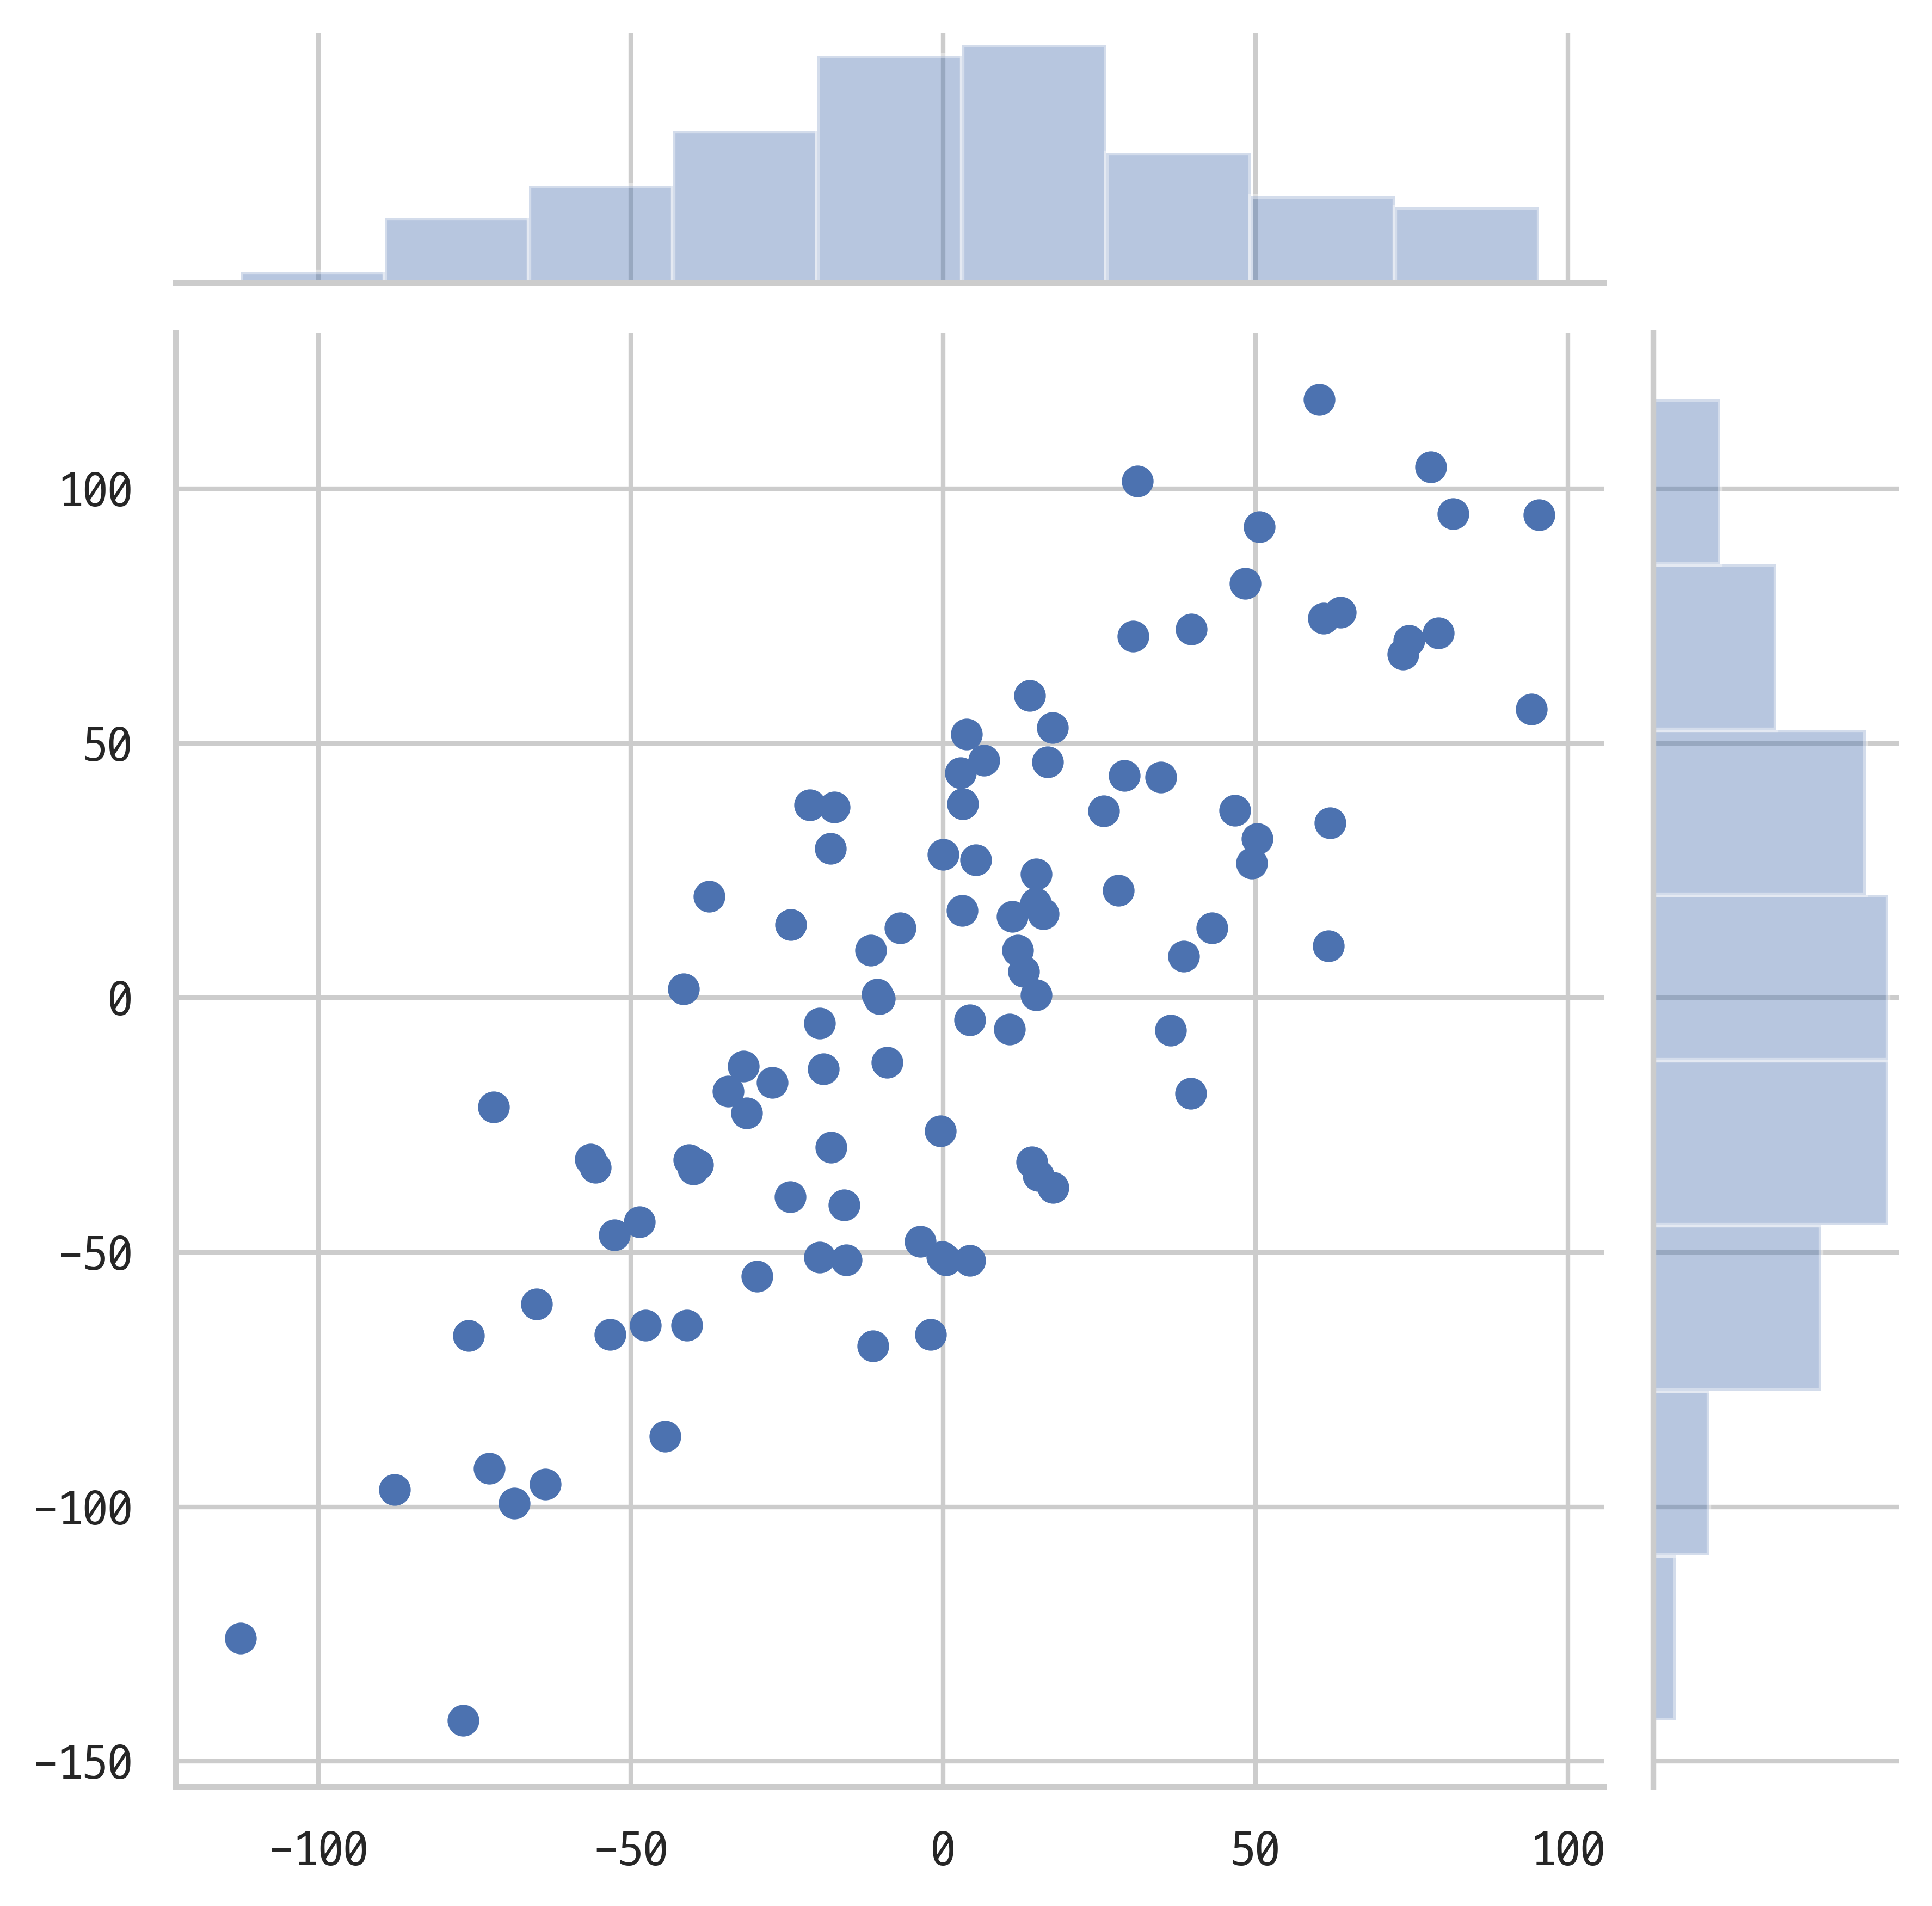

In [8]:
sns.jointplot(result.fittedvalues, y)
plt.show()

In [9]:
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=30, bias=100, coef=True, random_state=0)
dfX = pd.DataFrame(X0, columns=['X'])
dfy = pd.DataFrame(y, columns=['Y'])
df = pd.concat([dfX, dfy], axis=1)

model2 = sm.OLS.from_formula("Y ~ X + 0", data=df)
result2 = model2.fit()

In [10]:
result2.rsquared

0.18768724705943896

#### F 검정을 이용한 모형 비교

In [12]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX0_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX_boston = sm.add_constant(dfX0_boston)
dfy_boston = pd.DataFrame(boston.target, columns=['MEDV'])
df_boston = pd.concat([dfX_boston, dfy_boston], axis=1)

In [14]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", 
                                 data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ CRIM + ZN + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", data=df_boston)
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,494.0,11081.363952,0.0,NaN,NaN,NaN
1,492.0,11078.784578,2.0,2.579374,0.057274,0.944342


#### F 검정을 사용한 변수 중요도 비교

In [15]:
model_full = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", 
                                 data=df_boston)
model_reduced = sm.OLS.from_formula("MEDV ~ ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", 
                                    data=df_boston)
sm.stats.anova_lm(model_reduced.fit(), model_full.fit())

C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11322.004277,0.0,NaN,NaN,NaN
1,492.0,11078.784578,1.0,243.219699,10.801193,0.001087


In [21]:
model_boston = sm.OLS.from_formula("MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", 
                                 data=df_boston)
result_boston = model_boston.fit()
sm.stats.anova_lm(result_boston, typ=2).sort_values('PR(>F)')

,sum_sq,df,F,PR(>F)
LSTAT,2410.838689,1.0,107.063426,7.776912e-23
RM,1871.324082,1.0,83.104012,1.979441e-18
DIS,1232.412493,1.0,54.730457,6.013491e-13
PTRATIO,1194.233533,1.0,53.034960,1.308835e-12
NOX,487.155674,1.0,21.634196,4.245644e-06
RAD,479.153926,1.0,21.278844,5.070529e-06
B,270.634230,1.0,12.018651,5.728592e-04
ZN,257.492979,1.0,11.435058,7.781097e-04
CRIM,243.219699,1.0,10.801193,1.086810e-03
TAX,242.257440,1.0,10.758460,1.111637e-03


In [22]:
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 27 Oct 2020   Prob (F-statistic):          6.72e-135
Time:                        21:44:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0